# Basic Abstraction And Presentation



## Assumptions


### 1. Code in `CODE_ROOT_FOLDER`

In [227]:
# change to point to the right folder on your mahchine where you cloned the Zeeguu-Core
CODE_ROOT_FOLDER = '/Users/mircea/Zeeguu-Core/'

# And a helper function to construct
# the full path of a file by adding the CODE_ROOT_FOLDER

def full_path(file_name):
    return CODE_ROOT_FOLDER+file_name

### 2. All the imports and functions from [DataGathering_Intro](Data_Gathering_Intro.ipynb)

In [228]:
import sys
import pathlib
from pathlib import Path
import re
import networkx as nx
import matplotlib.pyplot as plt

In [229]:
def LOC(file):
    return sum([1 for line in open(file)])

In [230]:
def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    x = re.search("^import (\S+)", line) 
    x = re.search("^from (\S+)", line) 
    return x.group(1)

In [231]:
def imports(file):
    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

assert "sqlalchemy" in imports(full_path('zeeguu_core/model/user.py'))

In [232]:
def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(CODE_ROOT_FOLDER, full_path)

assert 'zeeguu_core.model.user' == module(full_path('zeeguu_core/model/user.py'))

In [233]:
def dependencies_graph():
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:
        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G

In [234]:
def draw_graph(G):
    plt.figure(figsize=(10,6))
    nx.draw(G)
    plt.show()

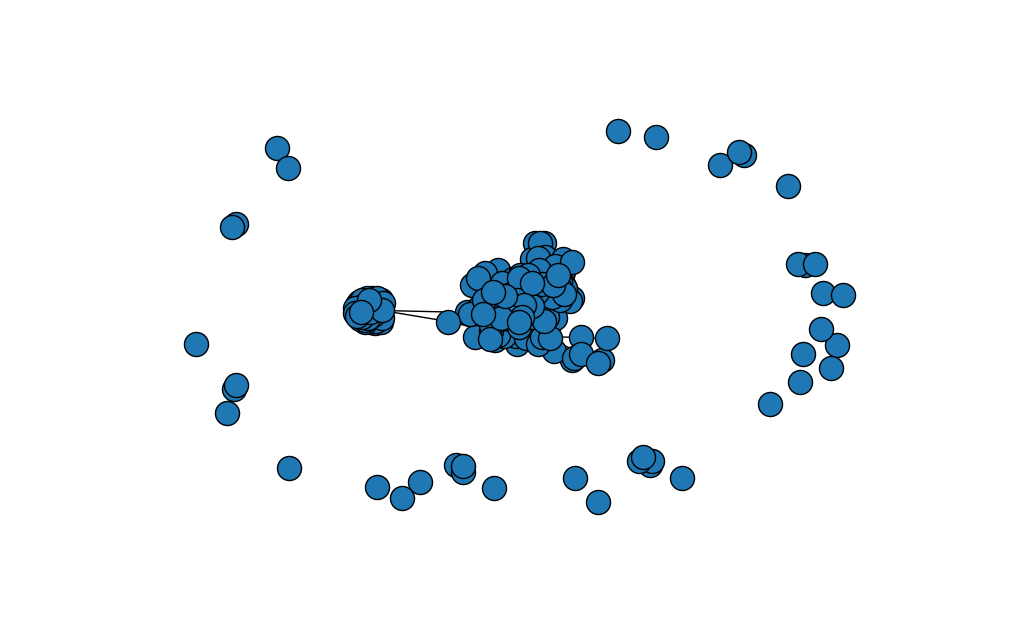

In [235]:
G = dependencies_graph()
draw_graph(G)

# 1. Basic Abstraction

### Aggregating Dependencies


## Distinguishing System Modules 

## But Dependencies Have Directions...



## Capturing all the modules... e.g. tools

# 2. Basic Presentation

### Remember the Definition of Architecture
- includes properties of modules


## Interactive Assignment
- draw the architecture of the zeeguu_core itself!
- i.e. expand to the top level modules in zeeguu core


### What did we observe
  - a circular dependency
  - a module called util - bad
  - to tell the story we need 
    - nouns and verbs
      - if nodes are nouns:
      - verbs = ???

### To Try Out: 
- can you export this to another interactive exploration tool?